# Rapid introduction on using numpy, scipy, matplotlib

This is meant to be a very brief reminder. It is strongly suggested to refer to more detailed
introductions and tutorials see for instance:
- [A Whirlwind tour of Python](http://nbviewer.jupyter.org/github/jakevdp/WhirlwindTourOfPython/blob/master/Index.ipynb)
- [Python data science handbook](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb)
- [Scipy lectures](http://www.scipy-lectures.org/)

## Introduction

Here we will look at :
- basic features regarding array manipulation and indexing
- do a bit of plotting with matplotlib
- use a number of useful scipy features
- see an example of vectorization with a simple Monte Carlo problem

## numpy: arrays, indexing etc



In [1]:
import numpy as np

In [2]:
np.array([3,4,5])

array([3, 4, 5])

In [3]:
np.array([[1, 2],[3,4]])

array([[1, 2],
       [3, 4]])

In [4]:
### linearly spaced 1D array
np.linspace(1.,10.,10)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [5]:
### log spaced 1D array
np.logspace(0.,1.,10)

array([  1.        ,   1.29154967,   1.66810054,   2.15443469,
         2.7825594 ,   3.59381366,   4.64158883,   5.9948425 ,
         7.74263683,  10.        ])

In [6]:
### 1D array of zeros
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

In [7]:
### 2D array of zeros
np.zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

### Types and casts

See numpy [dtypes](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)

In [8]:
x_int = np.logspace(0.,1.,10).astype('int')   # cast array as int
print(x_int)

[ 1  1  1  2  2  3  4  5  7 10]


In [9]:
x_int[1] = 2.34   # 2.34 is cast as int
print(x_int[1])

2


In [10]:
array_string = np.array(['a','b','c','d'])
array_string.dtype    # 1 character string

dtype('<U1')

In [11]:
array_string[1]='bbbb'   # 'bbbb' is cast on 1 character string
array_string[1]

'b'

In [12]:
array_string = np.array(['a','b','c','d'],dtype=np.dtype('S10'))
array_string[1] = 'bbbb'   # 'bbbb' is cast on 10 character string
array_string[1]

b'bbbb'

### array indexing & slicing

In [13]:
x = np.arange(10)

In [14]:
x[-1]   # last element

9

In [15]:
x[3:6]  # subarray

array([3, 4, 5])

In [16]:
x[1::2] # stride

array([1, 3, 5, 7, 9])

In [17]:
x[::-1] # stride

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [18]:
x = np.array([np.arange(10*i,10*i+5) for i in range(5)])
x

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [19]:
print("first column : ", x[:,0])
print("last row     : ", x[-1,:])

first column :  [ 0 10 20 30 40]
last row     :  [40 41 42 43 44]


In [20]:
b=x[-1,:]   # This is a view not a copy!
b[:] += 1

print(x) # the initial matrix is changed!

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [41 42 43 44 45]]


In [21]:
# Fancy indexing 
print(x % 2 == 1)

[[False  True False  True False]
 [False  True False  True False]
 [False  True False  True False]
 [False  True False  True False]
 [ True False  True False  True]]


In [22]:
x[x % 2 == 1] = 0
print(x)

[[ 0  0  2  0  4]
 [10  0 12  0 14]
 [20  0 22  0 24]
 [30  0 32  0 34]
 [ 0 42  0 44  0]]


### Broadcasting

In [23]:
x = np.linspace(1, 5, 5) + 4   # 4 is broadcast to 5 element array
x

array([ 5.,  6.,  7.,  8.,  9.])

In [24]:
y = np.zeros((3, 5)) + x   # x is broadcast to (3,5) array
y

array([[ 5.,  6.,  7.,  8.,  9.],
       [ 5.,  6.,  7.,  8.,  9.],
       [ 5.,  6.,  7.,  8.,  9.]])

## Plotting with matplotlib

We will see some plotting:
- Simple plots
- Histograms with matplotlib

In [25]:
# This is for embedding figures in the notebook
%matplotlib inline   
import matplotlib.pyplot as plt
plt.style.use('ggplot')         # Fancy style

## <span class="burk">Vectorization or loops</span>: A very simple MC

We want to solve a simple statistical question. Assume a Poisson random process of mean mu. What is the density probability function pdf(n_val) of having at least one realization of the Poisson process out of N larger than n_val? 

See for instance [this paper](https://arxiv.org/pdf/0903.4373.pdf)

While this problem has an analytical solution we would like to test it with a simple MC. 

We will first do it as one would do it with a C code and we will progressively vectorize the problem. We will use a timer to compare performance.



In [26]:
### Define the function
def poisson_sample_maximum(mu, N, Ntrials):
    """
    Generate a set of Ntrials random variables defined as the maximum of N 
    random Poisson R.V. of mean mu
    """
    res = np.zeros(Ntrials)
    ### Do a loop
    for i in range(Ntrials):
        ### Generate N random varslues 
        Y = np.random.poisson(mu, size=(N))
        ### Take the maximum 
        res[i] = np.max(Y)

    return res 
   
mu = 5
N = 10
Ntrials = 1000000
    
%timeit values = poisson_sample_maximum(mu, N, Ntrials)

7.69 s ± 322 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It does work, but no so fast...

To do it in a efficient and pythonic way we have to avoid loops as much as possible.

The idea here will then be to do all trials at once requiring random.poisson to produce a 2D matrix of size Nxtrials

In [32]:
### Define a better function
def poisson_sample_maximum_better(mu, N, Ntrials):
    """
    Generate a set of Ntrials random variables defined as the maximum of N 
    random Poisson R.V. of mean mu
    """
    ### Generate N*Ntrials random values in N x Ntrials matrix
    Y = np.random.poisson(mu,size=(N, Ntrials))
    ### Return the maximum in each row
    return np.max(Y,0) # Y shape is N x Ntrials  np.max(Y,1) is max for each col
   
mu = 5
N = 10
Ntrials = 1000000
    
%timeit values = poisson_sample_maximum_better(mu, N, Ntrials)

999 ms ± 48.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We can now compare the distribution of MC simulated values to the actual analytical function.


(1e-06, 1)

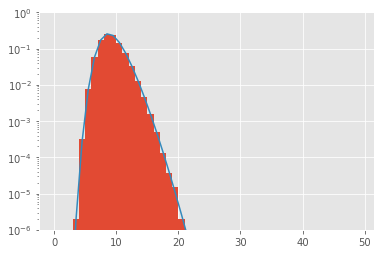

In [33]:
values = poisson_sample_maximum_better(mu,N,Ntrials)

### Make and plot the normalized histogram
### We define the binning ouselves to have bins for each integer
bins = np.arange(0, 10 * mu)
histo = plt.hist(values, bins=bins, normed=True, log=True)

### Now compare to the analytical solution
from scipy.special import gammaincc

### Define a lambda function to compute analytical solution
proba = lambda nv, Nr, mu_p : gammaincc(nv + 1, mu_p) ** Nr - gammaincc(nv, mu_p) ** Nr

x = 0.5 * (bins[:-1] + bins[1:])
y = proba(bins[:-1], N, mu)
plt.plot(x, y)
plt.ylim(1e-6,1)   # restrict y range

## Exercices

- write a vectorized function that takes an array of int and returns an array where square integers are replaced by their square root and the others are left unchanged

In [29]:
### A solution
def replace_square(n):
    sqrt_n = np.sqrt(n)
    return n + (sqrt_n == sqrt_n.astype(int))*(-n + sqrt_n)

print(replace_square(7.0))
print(replace_square(np.arange(26)))

7.0
[  0.   1.   2.   3.   2.   5.   6.   7.   8.   3.  10.  11.  12.  13.  14.
  15.   4.  17.  18.  19.  20.  21.  22.  23.  24.   5.]


In [30]:
### or using where
def replace_square2(n):
    sqrt_n = np.sqrt(n)
    return np.where(sqrt_n == sqrt_n.astype(int), 
                    sqrt_n, n)
        
print(replace_square2(7.0))       
print(replace_square2(np.arange(26)))

7.0
[  0.   1.   2.   3.   2.   5.   6.   7.   8.   3.  10.  11.  12.  13.  14.
  15.   4.  17.  18.  19.  20.  21.  22.  23.  24.   5.]
